In [2]:
import pandas as pd
import numpy as np
import pyspark

In [200]:
df_raw = pd.read_json("restaurant_reviews_1900k.json", lines=True)

In [201]:
many_reviews = df_raw[['business_id','review_id']].groupby("business_id")['review_id'].nunique()
many_reviews = many_reviews[many_reviews > 1000].index
df = df_raw[df_raw.business_id.isin(set(many_reviews))]
df.shape

(248846, 9)

In [202]:
len(df.business_id.unique())

142

In [203]:
subset = df.business_id.unique()[1:5]

In [204]:
df_sub = df[df.business_id.isin(set(subset))]

In [208]:
df_sub.business_id.unique()

array(['cHdJXLlKNWixBXpDwEGb_A', 'd_L-rfS1vT3JMzgCUGtiow',
       'N0apJkxIem2E8irTBRKnHw', 'IMLrj2klosTFvPRLv56cng'], dtype=object)

In [209]:
temp = df_sub[df_sub.business_id == 'N0apJkxIem2E8irTBRKnHw']

In [210]:
temp.text.iloc[4]

'We visited last week.  Be Warned! My husband\'s sister ordered a cheeseburger.  The waiter asked how she wanted it cooked and explained that "Medium" would be pink through-out.  She ordered the burger medium.  It took a very long time for our food to arrive and when it did, her burger was cooked very well done.  The waiter offered to have another burger made.  We had waited quite a while, and everyone was nearly done with their meals, all of us sharing with my sister-in-law whom still had no burger.  The waiter came by and my sister-in-law said to just cancel the order because we had already waited too long for it.  He said that he would take care of it.  A few minutes later, someone who appeared to be a manager came to the table delivering the burger we had already asked to be removed from the order.  My sister in law, frustrated at this point stated "No, I don\'t want it now".  The manager walked away.  A few minutes later I noticed the manager with a waiter standing in the middle o

In [212]:
item = temp[temp.text.str.lower().replace('\n','').str.contains('burger')]
item.text.iloc[0]
item["string_length"] = item.text.str.len()

short = item[item.string_length < 350]
long = item[item.string_length >= 1000]

short_good = short[short.stars > 3]
short_neutral = short[short.stars == 3]
short_bad = short[short.stars < 3]

print(short_good.shape)
print(short_neutral.shape)
print(short_bad.shape)

(53, 10)
(10, 10)
(5, 10)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [217]:
long_good = long[long.stars > 3]
long_neutral = long[long.stars == 3]
long_bad = long[long.stars < 3]

print(long_good.shape)
print(long_neutral.shape)
print(long_bad.shape)

(34, 10)
(9, 10)
(3, 10)


In [218]:
short_good.to_csv("short_good_burger.csv")
short_neutral.to_csv("short_neutral_burger.csv")
short_bad.to_csv("short_bad_burger.csv")


In [219]:
long_good.to_csv("long_good_burger.csv")
long_neutral.to_csv("long_neutral_burger.csv")
long_bad.to_csv("long_bad_burger.csv")

In [213]:
for i in range(5):
    print("Index: ", i)
    print(short_bad.text.iloc[i])
    print("\nSTARS:", short_neutral.stars.iloc[i])
    print('\n=========================================\n')

Index:  0
We thought this place would have wonderful food! Wrong! Worst burger ever...
If they spent more time on their food than the decor they might have decent food. Waitress was barely there...like in lala land there!
Wont go back!

STARS: 3


Index:  1
Ambience & service are great~food is okay. I got the burger, which at $17, was the cheapest option. It was dry & flavorless. The fries were limp shoestrings seasoned w/ too much salt. The salad was a joke. Two pickles and coleslaw, yes coleslaw, on two pieces of romaine.

STARS: 3


Index:  2
Food was so so. My fries were cold when served. Burger was good quality beef, but broken in bun and very salty.  Small end piece of tomato and soggy, sauce -soaked lettuce. Husband had chicken - presentation was beautiful.  Not cooked through,  pink in the middle.  Would not choose again

STARS: 3


Index:  3
First day in Vegas, up until WGP's wife and I have shared food. I had the chicken she got the prime burger, and caught ecoli from the mea

In [216]:
for i in range(10):
    print("Index: ", i)
    print(short_neutral.text.iloc[i])
    print("\nSTARS:", short_neutral.stars.iloc[i])
    print('\n=========================================\n')

Index:  0
on the whole was very good.  I like the variety of toppings for the burgers.  My first combo was grilled mushrooms, grilled onions, tomatoes, green peppers, with A-1and hot sauce.

STARS: 3


Index:  1
A bit pricey for what it is. But the crab cakes where good . Burger ordered medium arrived well done still tasty but not worth the bill

STARS: 3


Index:  2
The chinois salad was good. The burger that my boyfriend had was AMAZING!! The service is very good

STARS: 3


Index:  3
I was not very impressed. I had the prime rib burger and it was overly greasy and the mayo or whatever sauce was on it was too much. The fries were tasty though.  

Overall you can get a better meal elsewhere, but I will say the price is fairly reasonable for the location right in the middle of the casino.

STARS: 3


Index:  4
Not bad, but like everything else in Vegas these days: over-priced. I had a pizza, many at my table had the burger. The burger looked quite good. The pizza was fine, but nothing 

In [162]:
for i in range(5):
    print("Index: ", i)
    print(short_neutral.text.iloc[i])
    print("\nSTARS:", short_neutral.stars.iloc[i])
    print('\n=========================================\n')

Index:  0
Don't be fooled - this place is not a fusion of cuisines.  You get a combo plate of Chinese and Mexican.  I had the jade red chicken and fried rice (Chinese) with the black beans and quesadilla (Mexican).  The food was good but you can get better anywhere.

STARS: 3


Index:  1
This was my fault since I hyped it up too much.  I ordered the carnitas burrito and jade red chicken with the jerk fried rice.  She ordered the bbq pork with jerk fried rice.  It was underwhelming.  But there were tons of cats so they are doing something right.

STARS: 3


Index:  2
3.5 stars. 

Been here a few times, and the food is pretty good ..it would be awesome if they were open late nite.  

The jerk fried rice, the jade red chicken, and the jen red pork are great and dont disappoint.  The pollo diablo has good kick, and the hengrenade chicken is pretty good too.  The machaca is kinda bland, but the hot sauce helps.

STARS: 3


Index:  3
I been going to this restaurant for a few years now, I lik

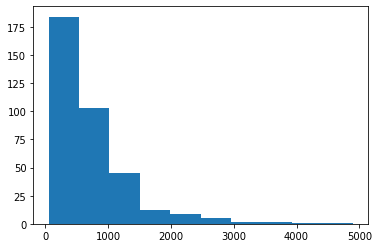

In [117]:
import matplotlib.pyplot as plt
plt.hist(jade_chicken.string_length)
plt.show()

In [ ]:
index = [
    
]

results = [
    
]

In [ ]:
# goal: create 